# Objective 2: How does the pandemic impact the industry?
Run this file after DA-23 where the data can be fetched first in the folders

## Data Acquisition
Although we considered 2016, 2017, 2018, 2019 and 2022 data which questioned about the remote work mode,
1. 2018 was omitted in the later stage, since it is not asking about frequency of remote work but priority.
2. 2017 was omitted to make the years jump every two years, which is more feasible in analysis.

And thus, 2016, 2019 and 2022 were the final sets we took.

In [1]:
# imports
from os.path import abspath, join, dirname
from os import makedirs
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
data_folder = join(dirname(abspath('')), 'data')
makedirs(data_folder, exist_ok=True)

data_2016 = pd.read_csv(join(data_folder, '2016 Stack Overflow Survey Responses.csv'))
# remote? - remote
# Instances:
# missing values
# Never

# I rarely work remotely
# Part-time

# Full-time remote


# data_2017 = pd.read_csv(join(data_folder, 'survey_results_public2017.csv'))
# remote? - HomeRemote
# Instances:
# NA
# Never

# A few days each month
# Less than half the time, but at least one day each week
# More than half, but not all, the time
# It's complicated

# All or almost all the time (I'm full-time remote)


# data_2018 = pd.read_csv(join(data_folder, 'survey_results_public2018.csv'))
# AssessJob7 - "Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the
# job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10
# is the least important. The opportunity to work from home/remotely
# Instances:
# 1 to 10

data_2019 = pd.read_csv(join(data_folder, 'survey_results_public2019.csv'))
# WorkRemote - How often do you work remotely?
# Instances:
# NA
# Less than once per month / Never

# A few days each month
# Less than half the time, but at least one day each week
# About half the time
# More than half, but not all, the time
# It's complicated

# All or almost all the time (I'm full-time remote)


# WorkLoc - Where would you prefer to work?


data_2022 = pd.read_csv(join(data_folder, 'survey_results_public2022.csv'))
# remote? - RemoteWork
# Instances:
# NA
# Full in-person
# Hybrid (some remote, some in-person)
# Fully remote



In [3]:
# column names for each year
column_names = {
    '2016': 'remote',
    # '2017': 'HomeRemote',
    '2019': 'WorkRemote',
    '2022': 'RemoteWork'
}

In [4]:
# data size
def print_remote_metrics_size():
    for year,column_name in column_names.items():
        print(f"Year {year}:")
        print(globals()[f"data_{year}"][column_name].shape)
        print("------------------")


print_remote_metrics_size()

Year 2016:
(56030,)
------------------
Year 2019:
(88883,)
------------------
Year 2022:
(73268,)
------------------


### Clean up
We chose to drop the missing values instead of fill them with `Not Applicable` label because this does not affect the normalised values we compute later on.

In [5]:
# fill NAs
# data_2016['remote'] = data_2016['remote'].fillna('Not Applicable')
# # data_2017['HomeRemote'] = data_2017['HomeRemote'].fillna('Not Applicable')
# data_2019['WorkRemote'] = data_2019['WorkRemote'].fillna('Not Applicable')
# data_2022['RemoteWork'] = data_2022['RemoteWork'].fillna('Not Applicable')

In [6]:
# drop NAs
for year, column_name in column_names.items():
    print(f"Year {year}:")
    globals()[f"data_{year}"] = globals()[f"data_{year}"].dropna(subset=[column_name])
    print("------------------")

print_remote_metrics_size()

Year 2016:
------------------
Year 2019:
------------------
Year 2022:
------------------
Year 2016:
(40118,)
------------------
Year 2019:
(70284,)
------------------
Year 2022:
(58958,)
------------------


In [7]:
def print_remote_metrics(da, col):
    print(da[col].value_counts())
    print(da[col].value_counts() / len(da[col]))
    print('NA counts:')
    print(da[col].isna().sum())

In [8]:
# check the percentages of instances after clean-up
for year, column_name in column_names.items():
    print(f"Year {year}:")
    print_remote_metrics(globals()[f"data_{year}"], column_name)
    print("------------------")

Year 2016:
I rarely work remotely    19212
Never                      8946
Part-time remote           7088
Full-time remote           4872
Name: remote, dtype: int64
I rarely work remotely    0.478887
Never                     0.222992
Part-time remote          0.176679
Full-time remote          0.121442
Name: remote, dtype: float64
NA counts:
0
------------------
Year 2019:
Less than once per month / Never                           30220
A few days each month                                      17242
All or almost all the time (I'm full-time remote)           8465
Less than half the time, but at least one day each week     6320
It's complicated                                            3675
More than half, but not all, the time                       2376
About half the time                                         1986
Name: WorkRemote, dtype: int64
Less than once per month / Never                           0.429970
A few days each month                                      0.245319


Although missing values are handled, the inconsistencies of the values are clearly seen above and the mappings later on will resolve this problem.

## EDA
### Mappings
Map the different categorical data throughout the years to the same naming convention in 2022.

Namely, they are Full in-person, Hybrid and Fully remote.

In [11]:
remote_mappings = {
    '2016': {
        'Never': 'Full in-person',
        'I rarely work remotely': 'Hybrid',
        'Part-time remote': 'Hybrid',
        'Full-time remote': 'Fully remote'
    },
    # '2017': {
    #     'Never': 'Full in-person',
    #     'A few days each month': 'Hybrid',
    #     'Less than half the time, but at least one day each week': 'Hybrid',
    #     'About half the time': 'Hybrid',
    #     'More than half, but not all, the time': 'Hybrid',
    #     'It\'s complicated': 'Hybrid',
    #     'All or almost all the time (I\'m full-time remote)': 'Fully remote'
    # },
    '2019': {
        'Less than once per month / Never': 'Full in-person',
        'A few days each month': 'Hybrid',
        'Less than half the time, but at least one day each week': 'Hybrid',
        'About half the time': 'Hybrid',
        'More than half, but not all, the time': 'Hybrid',
        'It\'s complicated': 'Hybrid',
        'All or almost all the time (I\'m full-time remote)': 'Fully remote'
    }
    ,
    '2022': {
        'Full in-person': 'Full in-person',
        'Hybrid (some remote, some in-person)': 'Hybrid',
        'Fully remote': 'Fully remote'
    }
}

for year, mappings in remote_mappings.items():
    if year == '2016':
        column_name = 'remote'
    # elif year == '2017':
    #     column_name = 'HomeRemote'
    elif year == '2019':
        column_name = 'WorkRemote'
    else:
        column_name = 'RemoteWork'
    data = globals()[f"data_{year}"]
    data[column_name] = data[column_name].replace(mappings)


## Visualisation and Analysis
Since we are interested in the change of work mode (remotely) during years which does not have strong relations, the bar chart is one good option to perform the visualisation.

In [12]:
# check the percentages after mappings
for year, column_name in column_names.items():
    print(f"Year {year}:")
    print_remote_metrics(globals()[f"data_{year}"], column_name)
    print("------------------")

Year 2016:
Hybrid            26300
Full in-person     8946
Fully remote       4872
Name: remote, dtype: int64
Hybrid            0.655566
Full in-person    0.222992
Fully remote      0.121442
Name: remote, dtype: float64
NA counts:
0
------------------
Year 2019:
Hybrid            31599
Full in-person    30220
Fully remote       8465
Name: WorkRemote, dtype: int64
Hybrid            0.44959
Full in-person    0.42997
Fully remote      0.12044
Name: WorkRemote, dtype: float64
NA counts:
0
------------------
Year 2022:
Fully remote      25341
Hybrid            25021
Full in-person     8596
Name: RemoteWork, dtype: int64
Fully remote      0.429814
Hybrid            0.424387
Full in-person    0.145799
Name: RemoteWork, dtype: float64
NA counts:
0
------------------


In [13]:
# remotes_labels = ['Not Applicable','Full in-person', 'Hybrid','Fully remote']
remotes_labels = ['Full in-person', 'Hybrid','Fully remote']


In [14]:
def compute_remotes_pct_over_years(pct,lbl,cols):
    # Compute the percentage of respondents for each year
    for yr, col in cols.items():
        da = globals()[f"data_{yr}"]
        pct.append(da[col].value_counts(normalize=True)[lbl])
    return pct

In [15]:
# Plot the percentage of respondents who work remotely over time
def plot_remotes_pct_over_years(pct,lbl):
    # plt.bar(['2016', '2017', '2019', '2022'], pct)
    plt.bar(['2016', '2019', '2022'], pct)
    plt.title('Percentage of respondents who work ' + lbl+' over time')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.ylim([0, 1])
    plt.show()

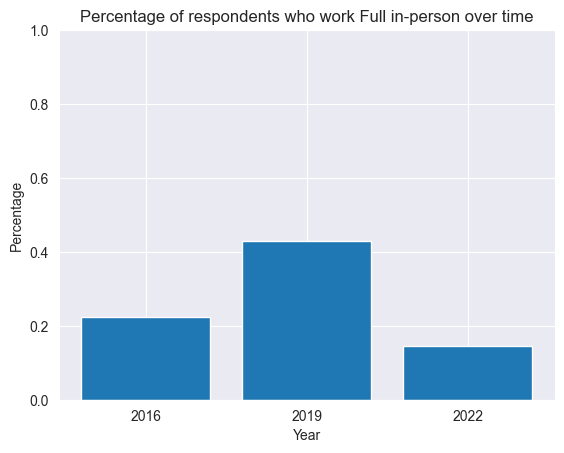

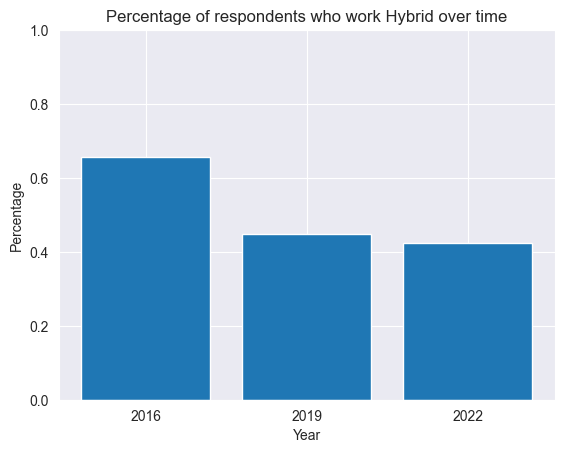

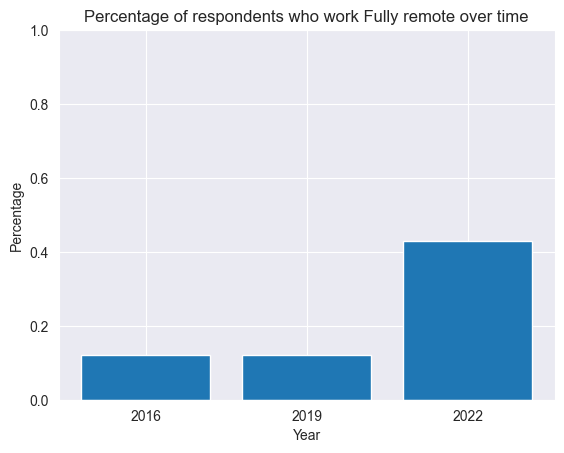

In [16]:
# plots the changes of each work mode
# not_applicable_pct = []
full_in_person_pct = []
hybrid_pct = []
fully_remote_pct = []

remotes_pct = [
    # not_applicable_pct,
    full_in_person_pct,
    hybrid_pct,
    fully_remote_pct
]

for label,percentage in zip(remotes_labels,remotes_pct):
    percentage = compute_remotes_pct_over_years(percentage,label,column_names)
    plot_remotes_pct_over_years(percentage,label)



It can be found that there's a slight decrease in hybrid work mode over these years. However, there's a huge increase in remote work, especially between 2019 and 2022.

Interestingly, work in-person became tremendously popular in 2019 in this industry and then witnessed a huge decline.

To conclude, these plots generally show how pandemic affects people's work mode in IT industry.